# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [578]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_dirty=pd.merge( study_results, mouse_metadata, how="left",on="Mouse ID")

# Display the data table for preview
mousestudy_dirty

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [458]:
# Checking the number of mice.
nummice=mousestudy_dirty["Mouse ID"].unique()
nummice=len(nummice)
nummice

249

In [459]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy_dup=mousestudy_dirty.loc[mousestudy_dirty.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
mousestudy_dup

array(['g989'], dtype=object)

In [460]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemouse=mousestudy_dirty.loc[mousestudy_dirty["Mouse ID"]=="g989"]
duplicatemouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [510]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousestudy=mousestudy_dirty.drop(mousestudy_dirty.index[(mousestudy_dirty["Mouse ID"]=="g989")],axis=0,inplace=False)
mousestudy.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [462]:
# Checking the number of mice in the clean DataFrame.
nummices=mousestudy["Mouse ID"].unique()
nummices=len(nummices)
nummices

248

## Summary Statistics

In [463]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
#Mean
mean_mouse=mousestudy.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
#Median
med_mouse=mousestudy.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
#Variance
var_mouse=mousestudy.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
#Standard Deviation
std_mouse=mousestudy.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
#SEM
sem_mouse=mousestudy.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
statssummary_1=pd.DataFrame({"Mean Tumor Volume":mean_mouse,
                            "Median Tumor Volume":med_mouse,
                            "Tumor Volume Variance":var_mouse,
                            "Tumor Volume Standard Deviation":std_mouse,
                            "Tumor Volume SEM":sem_mouse})


statssummary_1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [464]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
Treatmentstats = mousestudy.groupby('Drug Regimen')
statssummary_2 = Treatmentstats.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
statssummary_2

C:\Users\a_don\AppData\Local\Temp\ipykernel_16780\3008479794.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  statssummary_2 = Treatmentstats.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

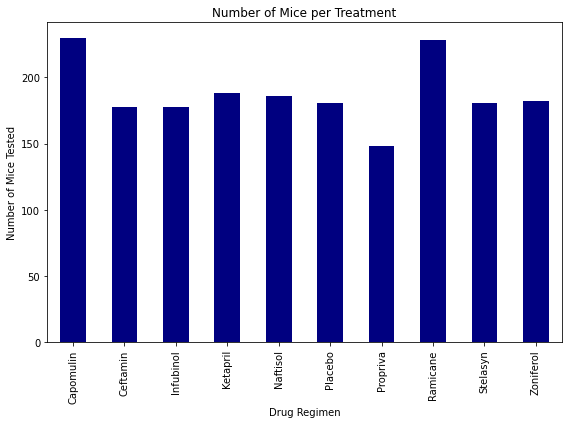

<AxesSubplot:title={'center':'Number of Mice per Treatment'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

In [465]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mousepertreatment = mousestudy.groupby(["Drug Regimen"]).count()["Mouse ID"] 

chart_treatment = mousepertreatment.plot.bar(figsize=(8,6), color='navy')
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.savefig("Images/BarPandas.png")
plt.show()

chart_treatment


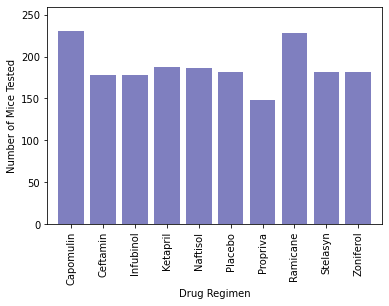

In [466]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
users=np.array(mousestudy.groupby(["Drug Regimen"]).count()["Mouse ID"])
x_axis=np.arange(len(users))

plt.bar(x_axis, users, color='navy', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Drug Regimen")
plt.ylim(0, max(x_axis)+250)
plt.ylabel("Number of Mice Tested")
plt.savefig("Images/BarPyPlot.png", bbox_inches = "tight")

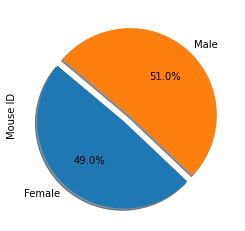

In [492]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mousegender = mousestudy.groupby(["Sex"]).count()["Mouse ID"]
genderpie = mousegender.plot.pie(y="Total Count", autopct="%1.1f%%",explode=(0.1, 0), shadow=True, startangle=140)
plt.savefig("Images/PiePandas.png", bbox_inches = "tight")

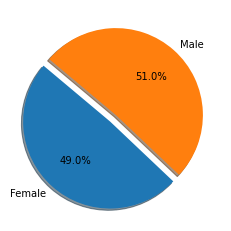

In [490]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = np.array(mousestudy.groupby(["Sex"]).count()["Mouse ID"])
plt.pie(sizes, explode=(0.1, 0), labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("Images/PiePyPlot.png", bbox_inches = "tight")

## Quartiles, Outliers and Boxplots

In [469]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
drugregimen = mousestudy.groupby(["Mouse ID"]).max()["Timepoint"]
drugregimen_df =pd.DataFrame(drugregimen)
drugregimen_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_mousestudy = pd.merge(drugregimen_df,mousestudy, how="left", on=["Mouse ID","Timepoint"])


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [470]:
# Put treatments into a list for for loop (and later for plot labels)
drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_reg:
    drug_tumor_vol=drug_mousestudy[(drug_mousestudy["Drug Regimen"]==drug)]["Tumor Volume (mm3)"]
    
    quartiles = drug_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol.append(drug_tumor_vol) 
    
    # Determine outliers using upper and lower bounds
    outlier = drug_tumor_vol[(drug_tumor_vol>upper_bound)|(drug_tumor_vol<lower_bound)]
    print(f"{drug}'s potential outliers: {outlier}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


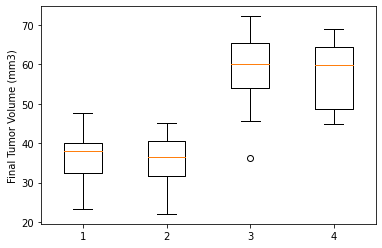

In [494]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol)
plt.show()


## Line and Scatter Plots

C:\Users\a_don\AppData\Local\Temp\ipykernel_16780\2999971680.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  line_plot=mousestudy[(mousestudy["Drug Regimen"]=="Capomulin")][mousestudy["Mouse ID"]=="b128"]


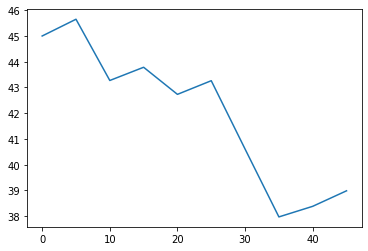

In [509]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot=mousestudy[(mousestudy["Drug Regimen"]=="Capomulin")][mousestudy["Mouse ID"]=="b128"]
line_x=line_plot["Timepoint"]
line_y=line_plot["Tumor Volume (mm3)"]
plt.plot(line_x,line_y)
plt.show()

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

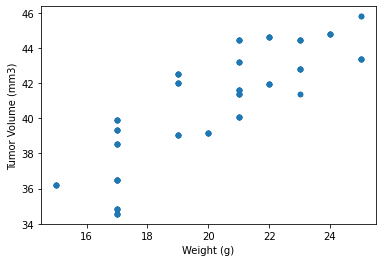

In [567]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin=mousestudy[(mousestudy["Drug Regimen"]=="Capomulin")]
avg_vol=pd.DataFrame(capomulin.groupby(capomulin["Mouse ID"]).mean()["Tumor Volume (mm3)"])
mouse_wt=capomulin.loc[:,["Weight (g)","Mouse ID"]]
scatter_plot=pd.merge(avg_vol,mouse_wt,how="right", on="Mouse ID")
scatter_plot.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")

## Correlation and Regression

The correlation between both factors is 0.83


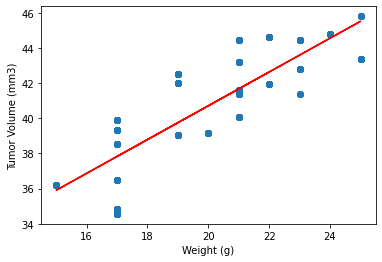

In [580]:
# For mouse weight and average tumor volume of the Capomulin regimen
# Calculate the correlation coefficient 
weight=scatter_plot.loc[:,"Weight (g)"]
tumor=scatter_plot.loc[:,"Tumor Volume (mm3)"]
correlation=round((st.pearsonr(weight, tumor))[0],2)
print(f"The correlation between both factors is {correlation}")

#and linear regression model 
x_values = scatter_plot["Weight (g)"]
y_values = scatter_plot["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()